# 11-1장. 텐서플로의 구조 자세히 알아보기

In [2]:
%load_ext watermark
%watermark -u -d -v -p numpy,tensorflow,matplotlib

Last updated: 2021-06-12

Python implementation: CPython
Python version       : 3.7.10
IPython version      : 7.24.1

numpy     : 1.20.2
tensorflow: 2.4.1
matplotlib: 3.4.2



**이 노트북을 실행하려면 텐서플로 2.0.0-alpha0 버전 이상이 필요합니다.**

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

## 텐서플로의 랭크와 텐서

**텐서의 랭크와 크기를 확인하는 방법**

In [4]:
## t1, t2, t3 텐서를 정의합니다.
t1 = tf.constant(np.pi)
t2 = tf.constant([1, 2, 3, 4])
t3 = tf.constant([[1, 2], [3, 4]])

## 랭크를 구합니다.
r1 = tf.rank(t1)
r2 = tf.rank(t2)
r3 = tf.rank(t3)

## 크기를 구합니다
s1 = t1.get_shape()
s2 = t2.get_shape()
s3 = t3.get_shape()
print('크기:', s1, s2, s3)

print('랭크:', 
      r1.numpy(), 
      r2.numpy(), 
      r3.numpy())

크기: () (4,) (2, 2)
랭크: 0 1 2


## 텐서를 다차원 배열로 변환하기

In [5]:
arr = np.array([[1., 2., 3., 3.5],
                [4., 5., 6., 6.5],
                [7., 8., 9., 9.5]])
T1 = tf.constant(arr)
print(T1)
s = T1.get_shape()
print('T1의 크기:', s)
print('T1의 크기:', T1.shape)
T2 = tf.Variable(np.random.normal(size=s))
print(T2)
T3 = tf.Variable(np.random.normal(size=s[0]))
print(T3)

tf.Tensor(
[[1.  2.  3.  3.5]
 [4.  5.  6.  6.5]
 [7.  8.  9.  9.5]], shape=(3, 4), dtype=float64)
T1의 크기: (3, 4)
T1의 크기: (3, 4)
<tf.Variable 'Variable:0' shape=(3, 4) dtype=float64, numpy=
array([[ 0.64741652,  0.40029964,  0.99530782,  1.5888734 ],
       [ 0.6140861 , -0.81935522,  1.26563378,  0.15801892],
       [-1.29961347,  0.15594767, -1.48597679,  0.83613151]])>
<tf.Variable 'Variable:0' shape=(3,) dtype=float64, numpy=array([2.49256473, 0.32603925, 1.44887714])>


In [6]:
T4 = tf.reshape(T1, shape=[1, 1, -1])
print(T4)
T5 = tf.reshape(T1, shape=[1, 3, -1])
print(T5)

tf.Tensor([[[1.  2.  3.  3.5 4.  5.  6.  6.5 7.  8.  9.  9.5]]], shape=(1, 1, 12), dtype=float64)
tf.Tensor(
[[[1.  2.  3.  3.5]
  [4.  5.  6.  6.5]
  [7.  8.  9.  9.5]]], shape=(1, 3, 4), dtype=float64)


In [7]:
T6 = tf.transpose(T5, perm=[2, 1, 0])
print(T6)
T7 = tf.transpose(T5, perm=[0, 2, 1])
print(T7)

tf.Tensor(
[[[1. ]
  [4. ]
  [7. ]]

 [[2. ]
  [5. ]
  [8. ]]

 [[3. ]
  [6. ]
  [9. ]]

 [[3.5]
  [6.5]
  [9.5]]], shape=(4, 3, 1), dtype=float64)
tf.Tensor(
[[[1.  4.  7. ]
  [2.  5.  8. ]
  [3.  6.  9. ]
  [3.5 6.5 9.5]]], shape=(1, 4, 3), dtype=float64)


In [8]:
t5_splt = tf.split(T5, 
                   num_or_size_splits=2, 
                   axis=2)
print(t5_splt)

[<tf.Tensor: shape=(1, 3, 2), dtype=float64, numpy=
array([[[1., 2.],
        [4., 5.],
        [7., 8.]]])>, <tf.Tensor: shape=(1, 3, 2), dtype=float64, numpy=
array([[[3. , 3.5],
        [6. , 6.5],
        [9. , 9.5]]])>]


In [9]:
t1 = tf.ones(shape=(5, 1), dtype=tf.float32)
t2 = tf.zeros(shape=(5, 1), dtype=tf.float32)
print(t1)
print(t2)

t3 = tf.concat([t1, t2], axis=0)
print(t3)
t4 = tf.concat([t1, t2], axis=1)
print(t4)

tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]], shape=(5, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(5, 1), dtype=float32)
tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(10, 1), dtype=float32)
tf.Tensor(
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]], shape=(5, 2), dtype=float32)


## 텐서플로의 계산 그래프 이해하기

In [10]:
a = tf.constant(1)
b = tf.constant(2) 
c = tf.constant(3) 

z = 2*(a-b) + c

print('2*(a-b)+c => ', z.numpy())

2*(a-b)+c =>  1


In [11]:
## 텐서플로 1.x 방식
g = tf.Graph()
 
## 그래프에 노드를 추가합니다.
with g.as_default():
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b') 
    c = tf.constant(3, name='c') 

    z = 2*(a-b) + c
    
## 그래프를 실행합니다.
with tf.compat.v1.Session(graph=g) as sess:
    print('2*(a-b)+c => ', sess.run(z))

2*(a-b)+c =>  1


In [12]:
g.get_operations()

[<tf.Operation 'a' type=Const>,
 <tf.Operation 'b' type=Const>,
 <tf.Operation 'c' type=Const>,
 <tf.Operation 'sub' type=Sub>,
 <tf.Operation 'mul/x' type=Const>,
 <tf.Operation 'mul' type=Mul>,
 <tf.Operation 'add' type=AddV2>]

In [13]:
g.as_graph_def()

node {
  name: "a"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "b"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 2
      }
    }
  }
}
node {
  name: "c"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 3
      }
    }
  }
}
node {
  name: "sub"
  op: "Sub"
  input: "a"
  input: "b"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
node {
  name: "mul/x"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    ke

In [14]:
@tf.function
def simple_func():
    a = tf.constant(1)
    b = tf.constant(2) 
    c = tf.constant(3) 

    z = 2*(a-b) + c
    return z

print('2*(a-b)+c => ', simple_func().numpy())

2*(a-b)+c =>  1


In [15]:
print(simple_func.__class__)

<class 'tensorflow.python.eager.def_function.Function'>


In [16]:
def simple_func():
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b') 
    c = tf.constant(3, name='c') 

    z = 2*(a-b) + c
    return z

simple_func = tf.function(simple_func)

print('2*(a-b)+c => ', simple_func().numpy())

2*(a-b)+c =>  1


In [17]:
con_func = simple_func.get_concrete_function()
con_func.graph.get_operations()

[<tf.Operation 'a' type=Const>,
 <tf.Operation 'b' type=Const>,
 <tf.Operation 'c' type=Const>,
 <tf.Operation 'sub' type=Sub>,
 <tf.Operation 'mul/x' type=Const>,
 <tf.Operation 'mul' type=Mul>,
 <tf.Operation 'add' type=AddV2>,
 <tf.Operation 'Identity' type=Identity>]

In [18]:
con_func.graph.as_graph_def()

node {
  name: "a"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "b"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 2
      }
    }
  }
}
node {
  name: "c"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 3
      }
    }
  }
}
node {
  name: "sub"
  op: "Sub"
  input: "a"
  input: "b"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
node {
  name: "mul/x"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    ke

## 텐서플로의 변수

In [19]:
g1 = tf.Graph()

with g1.as_default():
    w1 = tf.Variable(np.array([[1, 2, 3, 4],
                              [5, 6, 7, 8]]), name='w1')
print(w1)

<tf.Variable 'w1:0' shape=(2, 4) dtype=int64>


In [20]:
g1.get_operations()

[<tf.Operation 'w1/Initializer/initial_value' type=Const>,
 <tf.Operation 'w1' type=VarHandleOp>,
 <tf.Operation 'w1/IsInitialized/VarIsInitializedOp' type=VarIsInitializedOp>,
 <tf.Operation 'w1/Assign' type=AssignVariableOp>,
 <tf.Operation 'w1/Read/ReadVariableOp' type=ReadVariableOp>]

In [21]:
with g1.as_default():
    init = tf.compat.v1.global_variables_initializer()
    print(init.node_def)

name: "init"
op: "NoOp"
input: "^w1/Assign"



In [22]:
with g1.as_default():
    w1 = w1 + 1
    print(w1)
    
with tf.compat.v1.Session(graph=g1) as sess:
    init = tf.compat.v1.global_variables_initializer()
    sess.run(init)
    print(sess.run(w1))
    print(sess.run(w1))

Tensor("add:0", shape=(2, 4), dtype=int64)
[[2 3 4 5]
 [6 7 8 9]]
[[2 3 4 5]
 [6 7 8 9]]


In [23]:
g2 = tf.Graph()

with g2.as_default():
    w1 = tf.Variable(np.array([[1, 2, 3, 4],
                              [5, 6, 7, 8]]), name='w1')
    w1 = w1.assign(w1 + 1)

with tf.compat.v1.Session(graph=g2) as sess:
    init = tf.compat.v1.global_variables_initializer()
    sess.run(init)
    print(sess.run(w1))
    print(sess.run(w1))

[[2 3 4 5]
 [6 7 8 9]]
[[ 3  4  5  6]
 [ 7  8  9 10]]


In [24]:
w2 = tf.Variable(np.array([[1, 2, 3, 4],
                          [5, 6, 7, 8]]), name='w2')
print(w2)

<tf.Variable 'w2:0' shape=(2, 4) dtype=int64, numpy=
array([[1, 2, 3, 4],
       [5, 6, 7, 8]])>


In [25]:
print(w2 + 1)

tf.Tensor(
[[2 3 4 5]
 [6 7 8 9]], shape=(2, 4), dtype=int64)


In [26]:
w2.assign(w2 + 1)
print(w2.numpy())
w2.assign(w2 + 1)
print(w2.numpy())

[[2 3 4 5]
 [6 7 8 9]]
[[ 3  4  5  6]
 [ 7  8  9 10]]


In [27]:
print(w2) # 상수 값

<tf.Variable 'w2:0' shape=(2, 4) dtype=int64, numpy=
array([[ 3,  4,  5,  6],
       [ 7,  8,  9, 10]])>


## tf.keras API 자세히 배우기

### Sequential 모델

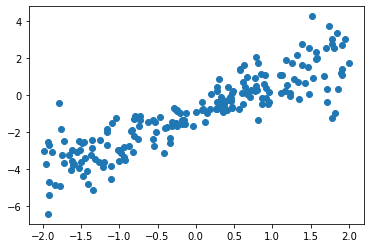

In [28]:
## 랜덤한 회귀용 예제 데이터셋을 만듭니다

np.random.seed(0)

def make_random_data():
    x = np.random.uniform(low=-2, high=2, size=200)
    y = []
    for t in x:
        r = np.random.normal(loc=0.0, 
                             scale=(0.5 + t*t/3), 
                             size=None)
        y.append(r)
    return  x, 1.726*x -0.84 + np.array(y)


x, y = make_random_data() 

plt.plot(x, y, 'o')
plt.show()

In [29]:
x_train, y_train = x[:150], y[:150]
x_test, y_test = x[150:], y[150:]

In [30]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(units=1, input_dim=1))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer='sgd', loss='mse')
history = model.fit(x_train, y_train, epochs=300, 
                    validation_split=0.3)

Epoch 1/300
4/4 [==============================] - 1s 77ms/step - loss: 14.5521 - val_loss: 8.5937
Epoch 2/300
4/4 [==============================] - 0s 7ms/step - loss: 11.9718 - val_loss: 7.0783
Epoch 3/300
4/4 [==============================] - 0s 7ms/step - loss: 9.6728 - val_loss: 5.8662
Epoch 4/300
4/4 [==============================] - 0s 7ms/step - loss: 7.7843 - val_loss: 4.9139
Epoch 5/300
4/4 [==============================] - 0s 7ms/step - loss: 5.8618 - val_loss: 4.2349
Epoch 6/300
4/4 [==============================] - 0s 6ms/step - loss: 5.5619 - val_loss: 3.5850
Epoch 7/300
4/4 [==============================] - 0s 6ms/step - loss: 4.3687 - val_loss: 3.0760
Epoch 8/300
4/4 [==============================] - 0s 7ms/step - loss: 3.4138 - val_loss: 2.6638
Epoch 9/300
4/4 [==============================] - 0s 7ms/step - loss: 3.0948 - val_loss: 2.3344
Epoch 10/300
4/4 [==============================] - 0s 6ms/step - loss: 2.9671 - val_loss: 2.0591
Epoch 11/300
4/4 [========

4/4 [==============================] - 0s 7ms/step - loss: 0.7154 - val_loss: 0.8995
Epoch 85/300
4/4 [==============================] - 0s 8ms/step - loss: 0.7201 - val_loss: 0.8987
Epoch 86/300
4/4 [==============================] - 0s 6ms/step - loss: 0.7149 - val_loss: 0.8977
Epoch 87/300
4/4 [==============================] - 0s 7ms/step - loss: 0.7558 - val_loss: 0.8970
Epoch 88/300
4/4 [==============================] - 0s 6ms/step - loss: 0.7805 - val_loss: 0.9003
Epoch 89/300
4/4 [==============================] - 0s 7ms/step - loss: 0.7946 - val_loss: 0.9021
Epoch 90/300
4/4 [==============================] - 0s 6ms/step - loss: 0.6876 - val_loss: 0.9016
Epoch 91/300
4/4 [==============================] - 0s 6ms/step - loss: 0.7306 - val_loss: 0.9029
Epoch 92/300
4/4 [==============================] - 0s 6ms/step - loss: 0.8499 - val_loss: 0.9024
Epoch 93/300
4/4 [==============================] - 0s 6ms/step - loss: 0.7711 - val_loss: 0.9030
Epoch 94/300
4/4 [===============

4/4 [==============================] - 0s 7ms/step - loss: 0.7756 - val_loss: 0.8995
Epoch 168/300
4/4 [==============================] - 0s 6ms/step - loss: 0.7638 - val_loss: 0.8989
Epoch 169/300
4/4 [==============================] - 0s 6ms/step - loss: 0.8258 - val_loss: 0.8981
Epoch 170/300
4/4 [==============================] - 0s 6ms/step - loss: 0.7165 - val_loss: 0.9013
Epoch 171/300
4/4 [==============================] - 0s 6ms/step - loss: 0.6750 - val_loss: 0.8978
Epoch 172/300
4/4 [==============================] - 0s 6ms/step - loss: 0.7895 - val_loss: 0.8975
Epoch 173/300
4/4 [==============================] - 0s 6ms/step - loss: 0.8475 - val_loss: 0.8969
Epoch 174/300
4/4 [==============================] - 0s 6ms/step - loss: 0.7014 - val_loss: 0.8942
Epoch 175/300
4/4 [==============================] - 0s 6ms/step - loss: 0.7628 - val_loss: 0.8922
Epoch 176/300
4/4 [==============================] - 0s 8ms/step - loss: 0.7304 - val_loss: 0.8942
Epoch 177/300
4/4 [=====

Epoch 250/300
4/4 [==============================] - 0s 8ms/step - loss: 0.8762 - val_loss: 0.8933
Epoch 251/300
4/4 [==============================] - 0s 6ms/step - loss: 0.6734 - val_loss: 0.8915
Epoch 252/300
4/4 [==============================] - 0s 8ms/step - loss: 0.7824 - val_loss: 0.8929
Epoch 253/300
4/4 [==============================] - 0s 6ms/step - loss: 0.7380 - val_loss: 0.8937
Epoch 254/300
4/4 [==============================] - 0s 7ms/step - loss: 0.7567 - val_loss: 0.8944
Epoch 255/300
4/4 [==============================] - 0s 8ms/step - loss: 0.7459 - val_loss: 0.8950
Epoch 256/300
4/4 [==============================] - 0s 6ms/step - loss: 0.7128 - val_loss: 0.8956
Epoch 257/300
4/4 [==============================] - 0s 6ms/step - loss: 0.7992 - val_loss: 0.8941
Epoch 258/300
4/4 [==============================] - 0s 6ms/step - loss: 0.8000 - val_loss: 0.8907
Epoch 259/300
4/4 [==============================] - 0s 6ms/step - loss: 0.8188 - val_loss: 0.8935
Epoch 260/

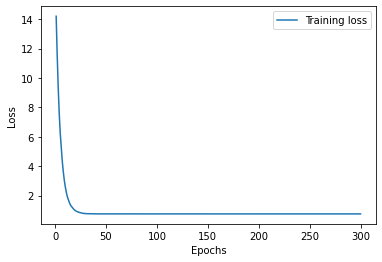

In [33]:
epochs = np.arange(1, 300+1)
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 함수형 API

In [34]:
input = tf.keras.Input(shape=(1,))
output = tf.keras.layers.Dense(1)(input)

model = tf.keras.Model(input, output)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(optimizer='sgd', loss='mse')
history = model.fit(x_train, y_train, epochs=300, 
                    validation_split=0.3)

Epoch 1/300
4/4 [==============================] - 0s 20ms/step - loss: 11.2927 - val_loss: 6.7036
Epoch 2/300
4/4 [==============================] - 0s 6ms/step - loss: 8.9512 - val_loss: 5.5603
Epoch 3/300
4/4 [==============================] - 0s 8ms/step - loss: 7.2275 - val_loss: 4.6365
Epoch 4/300
4/4 [==============================] - 0s 8ms/step - loss: 5.7932 - val_loss: 3.9207
Epoch 5/300
4/4 [==============================] - 0s 8ms/step - loss: 4.9417 - val_loss: 3.3282
Epoch 6/300
4/4 [==============================] - 0s 8ms/step - loss: 4.0204 - val_loss: 2.8896
Epoch 7/300
4/4 [==============================] - 0s 7ms/step - loss: 3.4312 - val_loss: 2.4941
Epoch 8/300
4/4 [==============================] - 0s 8ms/step - loss: 3.0203 - val_loss: 2.2233
Epoch 9/300
4/4 [==============================] - 0s 8ms/step - loss: 2.7947 - val_loss: 1.9989
Epoch 10/300
4/4 [==============================] - 0s 7ms/step - loss: 2.2083 - val_loss: 1.7866
Epoch 11/300
4/4 [=========

4/4 [==============================] - 0s 6ms/step - loss: 0.7461 - val_loss: 0.9008
Epoch 85/300
4/4 [==============================] - 0s 8ms/step - loss: 0.7585 - val_loss: 0.9049
Epoch 86/300
4/4 [==============================] - 0s 7ms/step - loss: 0.7848 - val_loss: 0.9055
Epoch 87/300
4/4 [==============================] - 0s 6ms/step - loss: 0.8434 - val_loss: 0.9054
Epoch 88/300
4/4 [==============================] - 0s 7ms/step - loss: 0.6805 - val_loss: 0.9036
Epoch 89/300
4/4 [==============================] - 0s 8ms/step - loss: 0.7259 - val_loss: 0.9048
Epoch 90/300
4/4 [==============================] - 0s 6ms/step - loss: 0.7677 - val_loss: 0.9032
Epoch 91/300
4/4 [==============================] - 0s 6ms/step - loss: 0.7373 - val_loss: 0.9070
Epoch 92/300
4/4 [==============================] - 0s 6ms/step - loss: 0.7632 - val_loss: 0.9090
Epoch 93/300
4/4 [==============================] - 0s 9ms/step - loss: 0.7462 - val_loss: 0.9126
Epoch 94/300
4/4 [===============

4/4 [==============================] - 0s 7ms/step - loss: 0.7804 - val_loss: 0.9129
Epoch 168/300
4/4 [==============================] - 0s 8ms/step - loss: 0.7871 - val_loss: 0.9094
Epoch 169/300
4/4 [==============================] - 0s 7ms/step - loss: 0.6635 - val_loss: 0.9108
Epoch 170/300
4/4 [==============================] - 0s 7ms/step - loss: 0.7585 - val_loss: 0.9149
Epoch 171/300
4/4 [==============================] - 0s 7ms/step - loss: 0.7426 - val_loss: 0.9126
Epoch 172/300
4/4 [==============================] - 0s 7ms/step - loss: 0.7514 - val_loss: 0.9143
Epoch 173/300
4/4 [==============================] - 0s 7ms/step - loss: 0.7254 - val_loss: 0.9156
Epoch 174/300
4/4 [==============================] - 0s 6ms/step - loss: 0.6867 - val_loss: 0.9136
Epoch 175/300
4/4 [==============================] - 0s 6ms/step - loss: 0.7168 - val_loss: 0.9093
Epoch 176/300
4/4 [==============================] - 0s 8ms/step - loss: 0.6869 - val_loss: 0.9052
Epoch 177/300
4/4 [=====

Epoch 250/300
4/4 [==============================] - 0s 6ms/step - loss: 0.7657 - val_loss: 0.9185
Epoch 251/300
4/4 [==============================] - 0s 6ms/step - loss: 0.7790 - val_loss: 0.9160
Epoch 252/300
4/4 [==============================] - 0s 6ms/step - loss: 0.7229 - val_loss: 0.9187
Epoch 253/300
4/4 [==============================] - 0s 8ms/step - loss: 0.6961 - val_loss: 0.9232
Epoch 254/300
4/4 [==============================] - 0s 8ms/step - loss: 0.6831 - val_loss: 0.9199
Epoch 255/300
4/4 [==============================] - 0s 8ms/step - loss: 0.6512 - val_loss: 0.9214
Epoch 256/300
4/4 [==============================] - 0s 7ms/step - loss: 0.7847 - val_loss: 0.9242
Epoch 257/300
4/4 [==============================] - 0s 6ms/step - loss: 0.8109 - val_loss: 0.9220
Epoch 258/300
4/4 [==============================] - 0s 7ms/step - loss: 0.7250 - val_loss: 0.9163
Epoch 259/300
4/4 [==============================] - 0s 7ms/step - loss: 0.6872 - val_loss: 0.9154
Epoch 260/

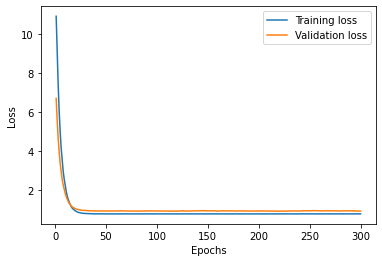

In [36]:
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## tf.keras 모델의 저장과 복원

In [37]:
model.save_weights('simple_weights.h5')

In [38]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=1))
model.compile(optimizer='sgd', loss='mse')

model.load_weights('simple_weights.h5')

In [39]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 1ms/step - loss: 1.0085


0.9481205940246582

In [40]:
model.save('simple_model.h5')

In [41]:
model = tf.keras.models.load_model('simple_model.h5')
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 1ms/step - loss: 0.9481


0.9481205940246582

In [42]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=1))
model.compile(optimizer='sgd', loss='mse')

callback_list = [tf.keras.callbacks.ModelCheckpoint(filepath='my_model.h5', 
                                 monitor='val_loss', save_best_only=True),
                 tf.keras.callbacks.EarlyStopping(patience=5)]
history = model.fit(x_train, y_train, epochs=300, 
                    validation_split=0.2, callbacks=callback_list)

Epoch 1/300
4/4 [==============================] - 0s 22ms/step - loss: 1.8459 - val_loss: 1.2019
Epoch 2/300
4/4 [==============================] - 0s 7ms/step - loss: 1.6359 - val_loss: 1.1234
Epoch 3/300
4/4 [==============================] - 0s 6ms/step - loss: 1.5213 - val_loss: 1.0565
Epoch 4/300
4/4 [==============================] - 0s 7ms/step - loss: 1.4964 - val_loss: 1.0029
Epoch 5/300
4/4 [==============================] - 0s 7ms/step - loss: 1.4133 - val_loss: 0.9603
Epoch 6/300
4/4 [==============================] - 0s 7ms/step - loss: 1.1684 - val_loss: 0.9239
Epoch 7/300
4/4 [==============================] - 0s 6ms/step - loss: 1.1738 - val_loss: 0.8966
Epoch 8/300
4/4 [==============================] - 0s 7ms/step - loss: 0.9723 - val_loss: 0.8724
Epoch 9/300
4/4 [==============================] - 0s 7ms/step - loss: 0.8758 - val_loss: 0.8525
Epoch 10/300
4/4 [==============================] - 0s 7ms/step - loss: 1.2078 - val_loss: 0.8378
Epoch 11/300
4/4 [==========

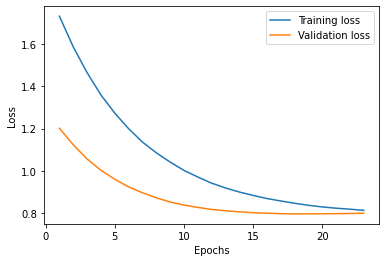

In [43]:
epochs = np.arange(1, len(history.history['loss'])+1)
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

저장된 모델 복원:

In [44]:
model = tf.keras.models.load_model('simple_model.h5')
model.load_weights('my_model.h5')
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 1ms/step - loss: 1.0170


1.0169605016708374

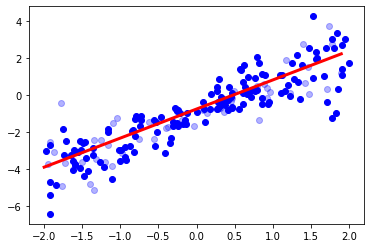

In [45]:
x_arr = np.arange(-2, 2, 0.1)
y_arr = model.predict(x_arr)

plt.figure()
plt.plot(x_train, y_train, 'bo')
plt.plot(x_test, y_test, 'bo', alpha=0.3)
plt.plot(x_arr, y_arr, '-r', lw=3)
plt.show()

## 계산 그래프 시각화하기

In [46]:
tf.keras.backend.clear_session()

In [47]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=1))

In [48]:
callback_list = [tf.keras.callbacks.TensorBoard(log_dir='logs')]
model.compile(optimizer='sgd', loss='mse')
history = model.fit(x_train, y_train, epochs=300, 
                    callbacks=callback_list, validation_split=0.3)

Epoch 1/300
4/4 [==============================] - 0s 37ms/step - loss: 4.4116 - val_loss: 2.8211
Epoch 2/300
4/4 [==============================] - 0s 8ms/step - loss: 3.7015 - val_loss: 2.4117
Epoch 3/300
4/4 [==============================] - 0s 8ms/step - loss: 2.9345 - val_loss: 2.1138
Epoch 4/300
4/4 [==============================] - 0s 8ms/step - loss: 2.7633 - val_loss: 1.8974
Epoch 5/300
4/4 [==============================] - 0s 9ms/step - loss: 2.4689 - val_loss: 1.7216
Epoch 6/300
4/4 [==============================] - 0s 6ms/step - loss: 2.0637 - val_loss: 1.5588
Epoch 7/300
4/4 [==============================] - 0s 8ms/step - loss: 1.8608 - val_loss: 1.4424
Epoch 8/300
4/4 [==============================] - 0s 7ms/step - loss: 1.6230 - val_loss: 1.3288
Epoch 9/300
4/4 [==============================] - 0s 8ms/step - loss: 1.6111 - val_loss: 1.2538
Epoch 10/300
4/4 [==============================] - 0s 6ms/step - loss: 1.4580 - val_loss: 1.1900
Epoch 11/300
4/4 [==========

4/4 [==============================] - 0s 6ms/step - loss: 0.7116 - val_loss: 0.9148
Epoch 85/300
4/4 [==============================] - 0s 7ms/step - loss: 0.7159 - val_loss: 0.9118
Epoch 86/300
4/4 [==============================] - 0s 6ms/step - loss: 0.8213 - val_loss: 0.9136
Epoch 87/300
4/4 [==============================] - 0s 6ms/step - loss: 0.7213 - val_loss: 0.9128
Epoch 88/300
4/4 [==============================] - 0s 8ms/step - loss: 0.7786 - val_loss: 0.9118
Epoch 89/300
4/4 [==============================] - 0s 6ms/step - loss: 0.7346 - val_loss: 0.9067
Epoch 90/300
4/4 [==============================] - 0s 6ms/step - loss: 0.8060 - val_loss: 0.9059
Epoch 91/300
4/4 [==============================] - 0s 7ms/step - loss: 0.7375 - val_loss: 0.9072
Epoch 92/300
4/4 [==============================] - 0s 6ms/step - loss: 0.7180 - val_loss: 0.9048
Epoch 93/300
4/4 [==============================] - 0s 7ms/step - loss: 0.7563 - val_loss: 0.9048
Epoch 94/300
4/4 [===============

4/4 [==============================] - 0s 7ms/step - loss: 0.6958 - val_loss: 0.8980
Epoch 168/300
4/4 [==============================] - 0s 8ms/step - loss: 0.7100 - val_loss: 0.9001
Epoch 169/300
4/4 [==============================] - 0s 7ms/step - loss: 0.7147 - val_loss: 0.9004
Epoch 170/300
4/4 [==============================] - 0s 8ms/step - loss: 0.7643 - val_loss: 0.9027
Epoch 171/300
4/4 [==============================] - 0s 8ms/step - loss: 0.7118 - val_loss: 0.9052
Epoch 172/300
4/4 [==============================] - 0s 8ms/step - loss: 0.6883 - val_loss: 0.9058
Epoch 173/300
4/4 [==============================] - 0s 7ms/step - loss: 0.6875 - val_loss: 0.9058
Epoch 174/300
4/4 [==============================] - 0s 7ms/step - loss: 0.7715 - val_loss: 0.9083
Epoch 175/300
4/4 [==============================] - 0s 6ms/step - loss: 0.6672 - val_loss: 0.9108
Epoch 176/300
4/4 [==============================] - 0s 8ms/step - loss: 0.7590 - val_loss: 0.9062
Epoch 177/300
4/4 [=====

Epoch 250/300
4/4 [==============================] - 0s 6ms/step - loss: 0.7008 - val_loss: 0.9152
Epoch 251/300
4/4 [==============================] - 0s 6ms/step - loss: 0.6664 - val_loss: 0.9116
Epoch 252/300
4/4 [==============================] - 0s 7ms/step - loss: 0.7336 - val_loss: 0.9070
Epoch 253/300
4/4 [==============================] - 0s 7ms/step - loss: 0.8078 - val_loss: 0.9074
Epoch 254/300
4/4 [==============================] - 0s 7ms/step - loss: 0.8085 - val_loss: 0.9107
Epoch 255/300
4/4 [==============================] - 0s 6ms/step - loss: 0.7448 - val_loss: 0.9092
Epoch 256/300
4/4 [==============================] - 0s 7ms/step - loss: 0.8280 - val_loss: 0.9091
Epoch 257/300
4/4 [==============================] - 0s 7ms/step - loss: 0.7385 - val_loss: 0.9093
Epoch 258/300
4/4 [==============================] - 0s 6ms/step - loss: 0.8178 - val_loss: 0.9083
Epoch 259/300
4/4 [==============================] - 0s 7ms/step - loss: 0.7316 - val_loss: 0.9078
Epoch 260/

코랩을 사용하거나 주피터 노트북을 로컬 컴퓨터에서 실행하는 경우엔 아래 두 개의 코드 셀의 주석을 삭제하고 실행하면 텐서보드를 노트북에 임베딩시킬 수 있습니다.

In [51]:
# %load_ext tensorboard.notebook

In [49]:
# %tensorboard --logdir logs --port 6006

<img src="tensorboard-1.png">

<img src="tensorboard-2.png">

In [52]:
input = tf.keras.Input(shape=(784,))
hidden = tf.keras.layers.Dense(100)(input)
output = tf.keras.layers.Dense(10)(hidden)

model = tf.keras.Model(input, output)

In [53]:
tf.keras.utils.plot_model(model, to_file='model_1.png')

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [54]:
tf.keras.utils.plot_model(model, show_shapes=True, to_file='model_2.png')

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
